## Notes/Observations

### Accuracy
- Test Accuracy of 87.35% was obtained
- No of parameters is 1M

### Architecture
- This is not the complete AlexNet Architecture.
- It is a smaller version of adapted to the CIFAR-10 dataset.
- The similarity to AlexNet is in the fact that there are 5 Convolutional layers, 3 Dense layers with the use of Dropout.
- The number of filters used in the conv layers are also similar to that of the complete AlexNet.
- There are 1M parameters in comparision to AlexNet's 62M parameters.
- The complete AlexNet architecture may perform better.

### Training
- Some simple augmentation was performed with the Keras ImageDataGenerator() function given by-
<br>datagen = ImageDataGenerator(
    <br>rotation_range=20,
    <br>width_shift_range=0.2,
    <br>height_shift_range=0.2,
    <br>horizontal_flip=True)

## Import the required libraries

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [ ]:
print(keras.__version__)

2.4.3


## Load and explore the data

In [ ]:
(x_train, y_train),(x_test, y_test)= keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
print('Dimensions and datatype of')
print('x_train:', x_train.shape, '\tdtype:', x_train.dtype)
print('y_train:', y_train.shape, '\t\tdtype:', y_train.dtype)
print('x_test:', x_test.shape, '\tdtype:', x_test.dtype)
print('y_test:', y_test.shape, '\t\tdtype:', y_test.dtype)

Dimensions and datatype of
x_train: (50000, 32, 32, 3) 	dtype: uint8
y_train: (50000, 1) 		dtype: uint8
x_test: (10000, 32, 32, 3) 	dtype: uint8
y_test: (10000, 1) 		dtype: uint8


## Normalize the data

In [ ]:
mean = np.mean(x_train)
print(mean)

120.70756512369792


In [ ]:
std = np.std(x_train)
print(std)

64.1500758911213


In [ ]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [ ]:
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

## Reshape input, add one hot encode labels and split between train and val

In [ ]:
from keras.utils import to_categorical
y_train =  to_categorical(y_train)
y_test  =  to_categorical(y_test)

In [ ]:
def simultaneous_shuffle(images, labels):
    np.random.seed(0)
    shuffle_ind = np.arange(images.shape[0])
    np.random.shuffle(shuffle_ind)
    images = images[shuffle_ind]
    labels = labels[shuffle_ind]
    return images, labels

In [ ]:
train_percent = 0.8
n_train = int(x_train.shape[0]*train_percent)
x_train, y_train = simultaneous_shuffle(x_train, y_train)
x_val, y_val = x_train[n_train:], y_train[n_train:]
x_train, y_train = x_train[:n_train], y_train[:n_train]

In [ ]:
print('Dimensions and datatype of')
print('x_train:', x_train.shape, '\tdtype:', x_train.dtype)
print('y_train:', y_train.shape, '\t\tdtype:', y_train.dtype)
print('x_val:', x_val.shape, '\tdtype:', x_val.dtype)
print('y_val:', y_val.shape, '\t\tdtype:', y_val.dtype)
print('x_test:', x_test.shape, '\tdtype:', x_test.dtype)
print('y_test:', y_test.shape, '\t\tdtype:', y_test.dtype)

Dimensions and datatype of
x_train: (40000, 32, 32, 3) 	dtype: float32
y_train: (40000, 10) 		dtype: float32
x_val: (10000, 32, 32, 3) 	dtype: float32
y_val: (10000, 10) 		dtype: float32
x_test: (10000, 32, 32, 3) 	dtype: float32
y_test: (10000, 10) 		dtype: float32


## Build the model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(48, (3,3), strides=(1,1), activation='relu', padding="same", input_shape=(32,32,3)))
model.add(Conv2D(128, (3,3), strides=(1,1), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(192, (3,3), strides=(1,1), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(192, (3,3), strides=(1,1), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(128, (3,3), strides=(1,1), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 48)        1344      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       55424     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 192)       221376    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 192)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 192)         331968    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 192)         0

## Compile and Train the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Saved Models')

from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('CIFAR_10_AlexNet.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(x_train)

In [ ]:
from keras.optimizers import Adam
adam = Adam(learning_rate=0.0005)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), validation_data=(x_val, y_val), epochs=75, steps_per_epoch=len(x_train) // 128, callbacks=mc)

Epoch 1/75
312/312 [==============================] - 27s 66ms/step - loss: 2.0384 - accuracy: 0.2210 - val_loss: 1.4692 - val_accuracy: 0.4618

Epoch 00001: val_loss improved from inf to 1.46923, saving model to CIFAR_10_AlexNet.h5
Epoch 2/75
312/312 [==============================] - 18s 59ms/step - loss: 1.5344 - accuracy: 0.4341 - val_loss: 1.2351 - val_accuracy: 0.5595

Epoch 00002: val_loss improved from 1.46923 to 1.23508, saving model to CIFAR_10_AlexNet.h5
Epoch 3/75
312/312 [==============================] - 18s 59ms/step - loss: 1.2834 - accuracy: 0.5374 - val_loss: 1.1803 - val_accuracy: 0.5902

Epoch 00003: val_loss improved from 1.23508 to 1.18026, saving model to CIFAR_10_AlexNet.h5
Epoch 4/75
312/312 [==============================] - 19s 60ms/step - loss: 1.1313 - accuracy: 0.5959 - val_loss: 0.9540 - val_accuracy: 0.6687

Epoch 00004: val_loss improved from 1.18026 to 0.95401, saving model to CIFAR_10_AlexNet.h5
Epoch 5/75
312/312 [==============================] - 18

## Test the model

In [ ]:
# Loading model with the lowest validation loss
model = keras.models.load_model("CIFAR_10_AlexNet.h5")

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test Set')
print('Loss:', test_loss)
print('Accuracy', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.8735
Test Set
Loss: 0.42574405670166016
Accuracy 0.8734999895095825


## Prediction

Below is the information on Fashion MNIST Class Labels.

In [ ]:
class_labels = dict([(0, 'Airplane'), (1, 'Automobile'), (2, 'Bird'),  (3, 'Cat'), (4, 'Deer'), (5, 'Dog'), (6, 'Frog'), (7, 'Horse'), (8, 'Ship'), (9, 'Truck')])
print('Label', "\t", 'Class\n')
for x in class_labels:
  print(x, "\t", class_labels[x])

Label 	 Class

0 	 Airplane
1 	 Automobile
2 	 Bird
3 	 Cat
4 	 Deer
5 	 Dog
6 	 Frog
7 	 Horse
8 	 Ship
9 	 Truck


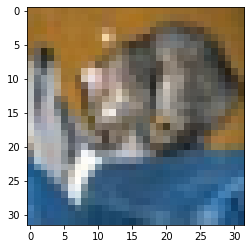

In [ ]:
# Set the index of the image in test set for which the output must be predicted
# Valid ind values range is: 0, 1, 2, ... 9999
ind = 0
plt.imshow((x_test[ind]*std + mean).astype(np.uint8))

In [ ]:
pred = model.predict(x_test[ind].reshape(1,32,32,3))
print('The pridicted probability different classes is')
print(pred)
print('The predicted class is', pred.argmax(), class_labels[pred.argmax()])
print('The actual class is', y_test[ind].argmax(), class_labels[y_test[ind].argmax()])

The pridicted probability different classes is
[[4.6176742e-06 1.5177579e-05 1.1647822e-05 9.0051502e-01 2.6366919e-05
  9.9279463e-02 3.4846747e-05 3.3036911e-05 1.7000028e-05 6.2819985e-05]]
The predicted class is 3 Cat
The actual class is 3 Cat


## Loss and Accuracy Curves

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
x_axis = range(1, len(train_loss)+1)

Text(0.5, 1.0, 'Loss Curve')

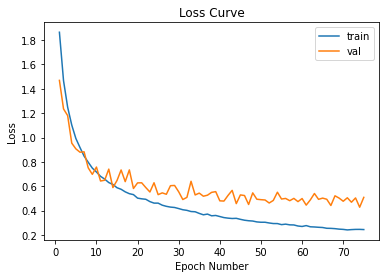

In [ ]:
plt.plot(x_axis, train_loss, label='train')
plt.plot(x_axis, val_loss, label='val')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Loss Curve')

Text(0.5, 1.0, 'Accuracy Curve')

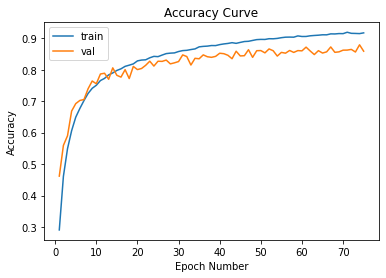

In [ ]:
plt.plot(x_axis, train_acc, label='train')
plt.plot(x_axis, val_acc, label='val')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')

## Additional Evaluation Metrics
### (Precision, Recall, Confusion Matrix)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)
target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.89      0.89      1000
     Class 1       0.95      0.94      0.94      1000
     Class 2       0.84      0.83      0.84      1000
     Class 3       0.83      0.68      0.74      1000
     Class 4       0.86      0.84      0.85      1000
     Class 5       0.83      0.83      0.83      1000
     Class 6       0.84      0.95      0.89      1000
     Class 7       0.89      0.92      0.90      1000
     Class 8       0.92      0.93      0.92      1000
     Class 9       0.89      0.94      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
cnf_matrix = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred)
print(cnf_matrix)

[[887   6  26   5   7   1   3   8  43  14]
 [  5 938   0   3   0   0   3   0   7  44]
 [ 21   6 828  20  35  22  45  15   2   6]
 [ 10   2  39 676  37 123  54  24  13  22]
 [  8   1  42  15 844  10  47  29   2   2]
 [  2   0  21  62  34 830  14  29   1   7]
 [  4   0  12  21   5   2 946   4   4   2]
 [  7   4  10   8  25  18   5 915   1   7]
 [ 39   6   2   2   0   0   4   3 928  16]
 [ 11  26   2   5   0   0   0   0  13 943]]
